# TensorFlow model for MNIST

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(42)

print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.6.0


Gets the mnist dataset from the datasets module.

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype(np.float32)
input_shape = train_images[0].shape
print(f"Input shape: {input_shape} {train_images[0].dtype}")

Input shape: (28, 28) float32


Example input

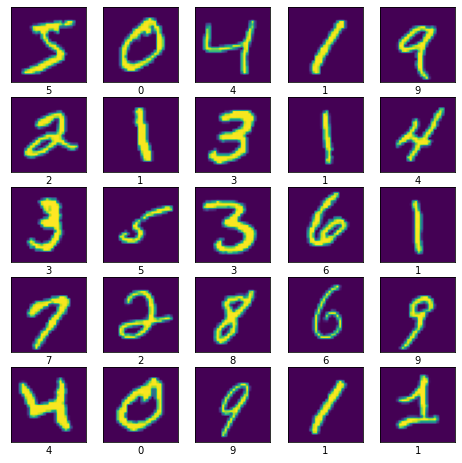

In [3]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

Construct the model.

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential(name="mnist_model")
model.add(Flatten(input_shape=input_shape, name="mnist_input"))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, name="mnist_output"))

Compile the model.

In [5]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mnist_input (Flatten)        (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
mnist_output (Dense)         (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Train the model.

In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5596 - accuracy: 0.8775 - val_loss: 0.4446 - val_accuracy: 0.9092
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.9294 - val_loss: 0.2477 - val_accuracy: 0.9398
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1921 - accuracy: 0.9487 - val_loss: 0.2111 - val_accuracy: 0.9483
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1650 - accuracy: 0.9543 - val_loss: 0.1738 - val_accuracy: 0.9536
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1484 - accuracy: 0.9595 - val_loss: 0.1805 - val_accuracy: 0.9505
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1290 - accuracy: 0.9651 - val_loss: 0.1695 - val_accuracy: 0.9563
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1235 - accuracy: 0.9670 - val_loss: 0.1478 - val_accuracy:

313/313 - 0s - loss: 0.1416 - accuracy: 0.9694


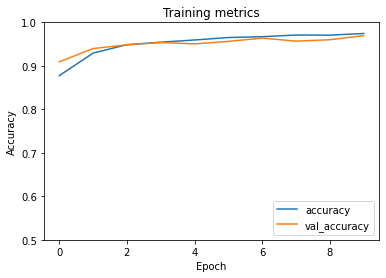

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Training metrics")

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Save the model in TensorFlow's SavedModel format.

In [8]:
model_path = "model/mnist_model"

In [9]:
model.save(model_path)

INFO:tensorflow:Assets written to: model/mnist_model\assets


# TensorFlow model to ONNX model

Load the model.

In [10]:
model = tf.keras.models.load_model(model_path)

Convert the model to the ONNX format.

In [11]:
import tf2onnx
print(tf2onnx.__version__)
spec = (tf.TensorSpec((None, ) + input_shape, tf.float32, name="mnist_input"),)
output_path = model.name + ".onnx"

model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, opset=13, output_path=output_path) 
output_names = [n.name for n in model_proto.graph.output]
input_names = [n.name for n in model_proto.graph.input]
print(f"Input names: {input_names}")
print(f"Output names: {output_names}")

1.9.2
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
Input names: ['mnist_input']
Output names: ['mnist_output']


Alternative method from the command line to convert a TensorFlow's SavedModel to ONNX model format.

In [ ]:
!python -m tf2onnx.convert --opset 13 \
  --saved-model {os.path.join("model", model.name)} \
  --output {os.path.join("", model.name + "_cli.onnx")} \
  --tag save